Prikazaćemo rad Yeo-Johnson stepene transformacije.

**Uzorak koji koristimo**: Prosečne dnevne temperature u godini.

In [14]:
# potrebne biblioteke
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew

In [2]:
import os

# formiramo putanju do fajla
current_dir = os.getcwd()

file_name = 'data/average_daily_temperatures.csv'
file_path = os.path.join(current_dir, file_name)

try:
    data = pd.read_csv(file_path, index_col = 0)
    print("File loaded successfully")
except FileNotFoundError as e:
    print(f"Error: {e}")

#prikazujemo podatke
df = data.reset_index()
df.head()

File loaded successfully


,Day,Average_Temperature
0,1,-13.703450
1,2,-18.330678
2,3,-19.181169
3,4,-21.029242
4,5,-12.448307


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  365 non-null    int64  
 1   Average_Temperature  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


In [4]:
df.shape

(365, 2)

In [5]:
average_data = df['Average_Temperature']

In [11]:
# ispitujemo koliko nula i negativnih vrednosti imamo u skupu podataka sa kojim radimo

count_zero = len(df[average_data == 0])
count_negative = len(df[average_data < 0])

count_zero, count_negative

(0, 105)

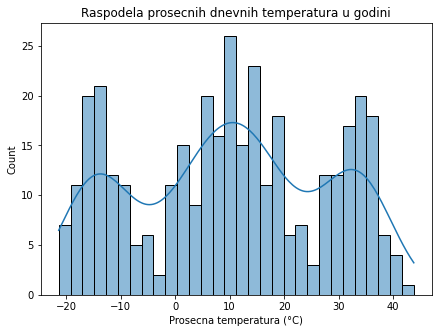

In [10]:
# Prikazujemo raspodelu originalnih podataka
plt.figure(figsize = (7, 5))

sns.histplot(average_data, kde=True, bins=30)
plt.xlabel('Prosecna temperatura (°C)')

plt.title('Raspodela prosecnih dnevnih temperatura u godini')
plt.show()

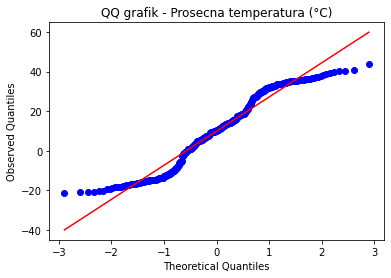

In [7]:
# Kreiranje QQ plota
stats.probplot(average_data, dist="norm", plot=plt)
plt.title('QQ grafik - Prosecna temperatura (°C)')
plt.ylabel('Observed Quantiles')
plt.xlabel('Theoretical Quantiles')
plt.show()

Na osnovu kreiranog QQ grafika vidimo da raspodela originalnih podataka ne prati normalnu raspodelu.

S obzirom da u skupu imamo negativne vrednosti, za normalizaciju raspodele primenjujemo Yeo-Johnson transformaciju.

## Yeo-Johnson transformacija

Slično Box-Cox transformaciji, glavna ideja ove stepene transformacije je da modifikuje oblik raspodele podataka kako bi se približio normalnoj raspodeli, što može poboljšati performanse statističkih analiza i modela mašinskog učenja.

Bitne karakteristike:

- Primenljivost: Može se koristiti za podatke koji sadrže i pozitivne i negativne vrednosti.
- Parametar λ: Kontroliše oblik transformacije, gde različite vrednosti λ dovode do različitih modifikacija u raspodeli podataka.


Najčešće za sprovođenje transformacije koristi funkcija yeojohnson iz biblioteke **scipy.stats** koja omogućava automatsko određivanje optimalne vrednosti λ tako da **maksimizuje normalnost transformisanih podataka**. Kada pozovemo funkciju bez eksplicitnog zadavanja vrednosti λ, ona će pronaći najbolju moguću vrednost koja minimizuje asimetriju i približava raspodelu normalnoj.

Optimalna vrednost lambda: 0.9915290309772788


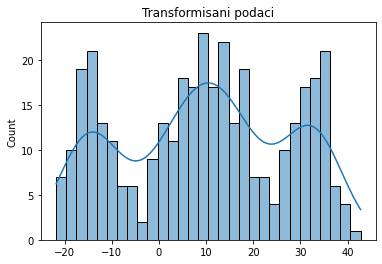

In [18]:
# Primena Yeo-Johnson transformacije
transformed_data, lambda_best_fit = stats.yeojohnson(average_data)

print(f"Optimalna vrednost lambda: {lambda_best_fit}")

# Prikaz rezultata
sns.histplot(transformed_data, kde=True, bins=30)
plt.title('Transformisani podaci')

plt.show()

### Određivanje optimalne lambda vrednosti pomoću log-verovatnoće

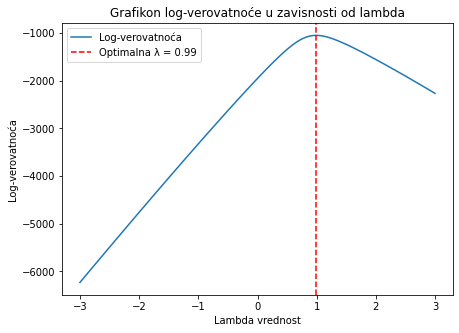

In [19]:
# ponavljamo slican postupak kao kod Box-Cox transformacije
plt.figure(figsize = (7, 5))

# određivanje optimalna vrednost λ
lambdas = np.linspace(-3, 3, 100)
log_likelihoods = []

for l in lambdas:
    log_likelihood = stats.yeojohnson_llf(l, average_data)  # Izračunaj log-verovatnoću
    log_likelihoods.append(log_likelihood)

# Plotovanje log-verovatnoće
plt.plot(lambdas, log_likelihoods, label='Log-verovatnoća')
plt.axvline(lambda_best_fit, color='red', linestyle='--', label=f'Optimalna λ = {lambda_best_fit:.2f}')
plt.xlabel('Lambda vrednost')
plt.ylabel('Log-verovatnoća')
plt.title('Grafikon log-verovatnoće u zavisnosti od lambda')
plt.legend()
plt.show()

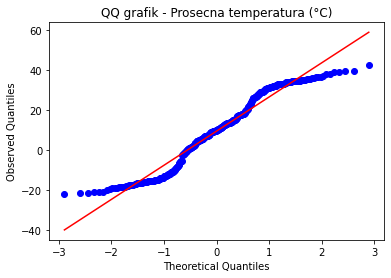

In [20]:
# Kreiranje QQ plota
stats.probplot(transformed_data, dist="norm", plot=plt)
plt.title('QQ grafik - Prosecna temperatura (°C)')
plt.ylabel('Observed Quantiles')
plt.xlabel('Theoretical Quantiles')
plt.show()

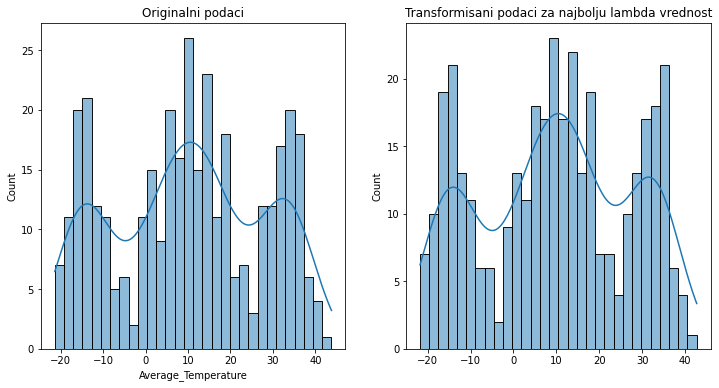

In [21]:
# Prikaz histograma za najbolju lambda vrednost
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(average_data, kde=True, bins=30)
plt.title('Originalni podaci')

plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True, bins=30)
plt.title('Transformisani podaci za najbolju lambda vrednost')

plt.show()

In [26]:
org_skew_val = skew(average_data , axis=0, bias=True)
print('Original skew:{}'.format(org_skew_val))

transformed_skew_val = skew(transformed_data , axis=0, bias=True)
print('Original skew:{}'.format(transformed_skew_val))

Original skew:-0.05292957534985839
Original skew:1.6217919514078891


S obzirom da primenom Yeo Johnson dobijamo da je optimalna vrednost za lambdu 0.99. Zbog blizine 1, transformacija samih podataka nije značajna, originalna raspodela podataka je bila bliska normalnojTo vidimo i po originalnoj vrednosti za asimetriju, bliska je 0.

----------------------------------------------------------------------------------------------------------------

In [22]:
# Generisanje podataka za standardnu Kosijevu raspodelu, gde je x0=0 i γ=1

np.random.seed(0)
cauchy_data = np.random.standard_cauchy(size=1000)

Optimalna vrednost lambda: 1.135653616610306


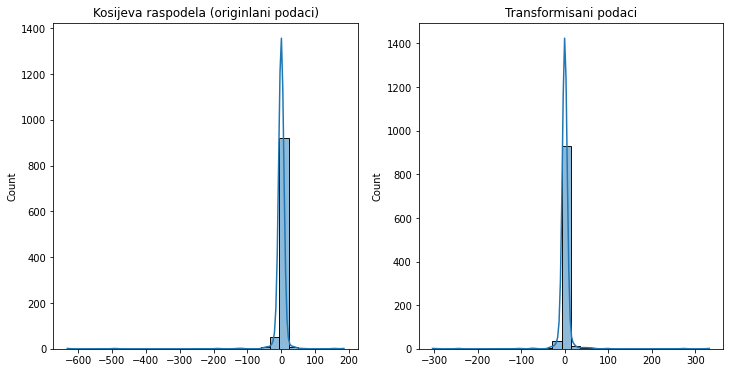

In [23]:
# Primena Yeo-Johnson transformacije
transformed_data, lambda_best_fit = stats.yeojohnson(cauchy_data)

print(f"Optimalna vrednost lambda: {lambda_best_fit}")

# Prikaz histograma
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(cauchy_data, kde=True, bins=30)
plt.title('Kosijeva raspodela (originlani podaci)')

plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True, bins=30)
plt.title('Transformisani podaci')

plt.show()

In [25]:
org_skew_val = skew(cauchy_data , axis=0, bias=True)
print('Original skew:{}'.format(org_skew_val))

transformed_skew_val = skew(transformed_data , axis=0, bias=True)
print('Original skew:{}'.format(transformed_skew_val))

Original skew:-15.998349943479276
Original skew:1.6217919514078891


Vidimo da smo transformacijom dobili asimetriju koja je bliža 0 (asimetrija standardne normalne raspodele).

Kao i kod Box-Cox transformacije, za transformaciju možemo iskoristiti funkciju **PowerTransformer** iz biblioteke scikit-learn.

In [27]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson',standardize = False)
transformed_data_pt = pt.fit_transform(cauchy_data.reshape(-1,1))

lambda_value = pt.lambdas_[0]

print(f"Optimalna vrednost lambda: {lambda_value}")

Optimalna vrednost lambda: 1.135653616610306


Vidimo da je i u slučaju Yeo-Johnson transformacije dobijena vrednost za lambdu ista kao i ona dobijena koristeći scipy.stats biblioteku.

Hoćemo i grafički da uporedimo dva načina sprovođenja transformacije.

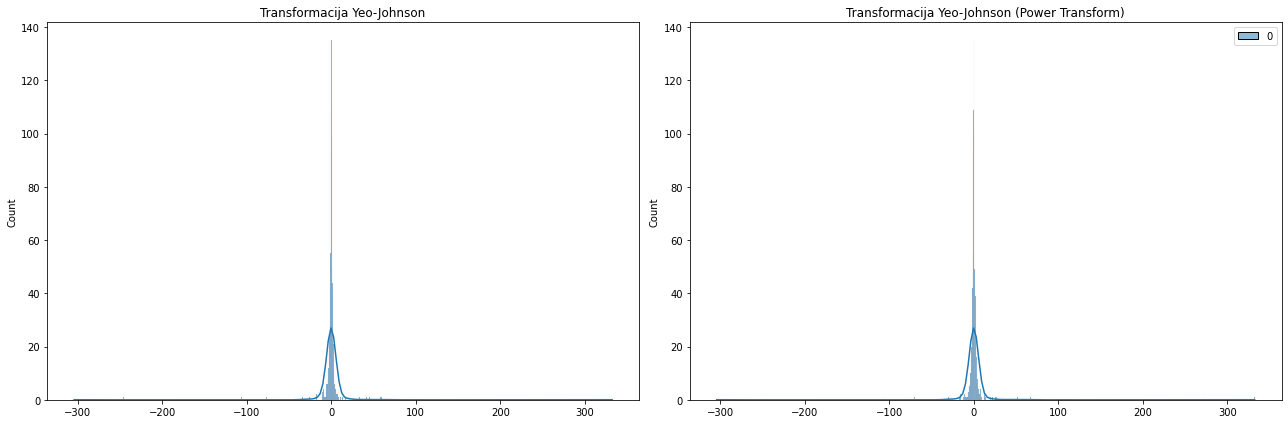

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(transformed_data, ax=axes[0], kde=True)
axes[0].set_title('Transformacija Yeo-Johnson')

sns.histplot(transformed_data_pt, ax=axes[1], kde=True)
axes[1].set_title('Transformacija Yeo-Johnson (Power Transform)')

plt.tight_layout()
plt.show()